In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[]

In [2]:
import zipfile

def unzip_quietly(filename):
  with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(path='')  # Extract to current working directory

# Example usage:
unzip_quietly('Clothing.zip')

In [4]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

def read_and_decode(filename, reshape_dims):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)

  # img = tf.image.decode_image(img, channels=IMG_CHANNELS, expand_animations=False)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # img = tf.resize_images_v2(img, reshape_dims, method="bilinear")
  # return img.set_shape((image_size[0], image_size[1], num_channels))

  # Resize the image to the desired size.
  img = tf.image.resize(img, reshape_dims) #[244,244] using image module for resizing,
  #must also apply on testing and validation dataset
  return img

  ##add prediction and preprocessing

#change regex pattern from PetImages\\ to PetImages/
pattern = r'Clothing/'
print(tf.io.gfile.glob("Clothing/*"))
CLASS_NAMES = [item.numpy().decode("utf-8") for item in
               tf.strings.regex_replace(
                 tf.io.gfile.glob("Clothing/*"),
                 pattern, "")]

print(CLASS_NAMES)
CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
print("These are the available classes:", CLASS_NAMES)

['Clothing\\Jacket', 'Clothing\\LongPants', 'Clothing\\Sandals', 'Clothing\\Shoes', 'Clothing\\ShortPants', 'Clothing\\TShirt']
['Clothing\\Jacket', 'Clothing\\LongPants', 'Clothing\\Sandals', 'Clothing\\Shoes', 'Clothing\\ShortPants', 'Clothing\\TShirt']
These are the available classes: ['Clothing\\Jacket', 'Clothing\\LongPants', 'Clothing\\Sandals', 'Clothing\\Shoes', 'Clothing\\ShortPants', 'Clothing\\TShirt']


['Clothing\\Jacket\\-1x-1.jpg', 'Clothing\\Jacket\\04391708526-a3.jpg', 'Clothing\\Jacket\\0584011ccd0a0ab3b4d80638bf76ee61.jpg', 'Clothing\\Jacket\\119368-BLK00-front.jpg', 'Clothing\\Jacket\\119598-REFP0-front.jpg', 'Clothing\\Jacket\\1629717737612384e9619ceYDS_Product_42x.jpg', 'Clothing\\Jacket\\186543001_g1.jpg', 'Clothing\\Jacket\\1_7d097a2f-a15a-4674-93ce-a06c1af49cf1.jpg', 'Clothing\\Jacket\\230117-puffer-jacket-bd-2x1.jpg', 'Clothing\\Jacket\\238507001_g0.jpg', 'Clothing\\Jacket\\240301-plp-jackets-m-m.jpg', 'Clothing\\Jacket\\26_223-6013-L_2776_ca3c4dae-f3fb-469e-90e7-a2e948c2980a_1024x.jpg', 'Clothing\\Jacket\\430102-9399-201034-2-zoom.jpg', 'Clothing\\Jacket\\433377126_max.jpg', 'Clothing\\Jacket\\51KjY0T1U6L._AC_UY1100_.jpg', 'Clothing\\Jacket\\51Re8qRfcYL._AC_UY1100_.jpg', 'Clothing\\Jacket\\65380ba9e86ef865334fcb14-men-denim-jacket-streetwear-hip-hop.jpg', 'Clothing\\Jacket\\71oEH14QJL._AC_UY1100_.jpg', 'Clothing\\Jacket\\784x1000_58721_b094815d736ffcf1476708893cc63a74_1

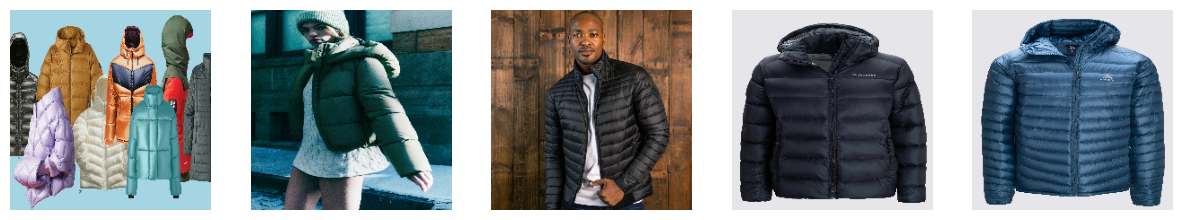

In [5]:
clothing = tf.io.gfile.glob("Clothing/Jacket/*.jpg")
f, ax = plt.subplots(1, 5, figsize=(15,15))
print(clothing)
for idx, filename in enumerate(clothing[:5]):
  print(filename)
  print(idx)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()));
  ax[idx].axis('off')

In [10]:
import pandas as pd
import os

df = pd.DataFrame(columns=['path', 'class'])
absolutePath = r"Clothing/"

# Get a list of class subdirectories within the absolute path
class_dirs = [d for d in os.listdir(absolutePath) if os.path.isdir(os.path.join(absolutePath, d))]

for class_dir in class_dirs:
  class_path = os.path.join(absolutePath, class_dir)

  # Find image files within the class directory using a glob pattern
  image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg'))]

  paths_df = pd.DataFrame({'path': image_paths})
  paths_df['class'] = class_dir

  df = pd.concat([df, paths_df], ignore_index=True)

print(df)


                                                  path   class
0                            Clothing/Jacket\-1x-1.jpg  Jacket
1                   Clothing/Jacket\04391708526-a3.jpg  Jacket
2    Clothing/Jacket\0584011ccd0a0ab3b4d80638bf76ee...  Jacket
3               Clothing/Jacket\119368-BLK00-front.jpg  Jacket
4               Clothing/Jacket\119598-REFP0-front.jpg  Jacket
..                                                 ...     ...
922                Clothing/TShirt\white-t-shirt-2.jpg  TShirt
923  Clothing/TShirt\whitetshirts-2048px-0297-2x1-1...  TShirt
924  Clothing/TShirt\White_O_Crew_Regular_NoPocket-...  TShirt
925  Clothing/TShirt\White_O_Crew_Regular_NoPocket.jpg  TShirt
926  Clothing/TShirt\zbcc46ow5hja3zytqk4hrqh1ik5vil...  TShirt

[927 rows x 2 columns]


In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df["path"], df["class"], test_size=0.20)

X_train_df = pd.DataFrame(X_train, columns=["path"])
X_test_df = pd.DataFrame(X_test, columns=["path"])

trainData = pd.concat([X_train_df, y_train], axis=1)
testData = pd.concat([X_test_df, y_test], axis=1)

trainData.to_csv("train.csv",index=False, header=False)
testData.to_csv("test.csv",index=False, header=False)
print(trainData)


                                                  path       class
444                      Clothing/Sandals\image55.jpeg     Sandals
457                        Clothing/Sandals\images.jpg     Sandals
131                       Clothing/Jacket\images34.jpg      Jacket
184               Clothing/Jacket\puffer-coat-lead.jpg      Jacket
755  Clothing/ShortPants\PJdgFFrNJGgTmmUQMUm4WZWtKM...  ShortPants
..                                                 ...         ...
78                        Clothing/Jacket\image45.jpeg      Jacket
23   Clothing/Jacket\argo-down-bomber-jacket-women-...      Jacket
714                   Clothing/ShortPants\image50.jpeg  ShortPants
857                       Clothing/TShirt\image42.jpeg      TShirt
264                    Clothing/LongPants\image25.jpeg   LongPants

[741 rows x 2 columns]


In [12]:
def decode_csv(csv_row):
  record_defaults = ["path", "class"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.argmax(tf.math.equal(CLASS_NAMES, label_string))
  return img, label

In [13]:
train_dataset = (tf.data.TextLineDataset(
    "train.csv").
    map(decode_csv)).batch(10)

eval_dataset = (tf.data.TextLineDataset(
    "test.csv").
    map(decode_csv)).batch(10)

print(train_dataset)
print(eval_dataset)


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [14]:
# linear model
model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
                tf.keras.layers.Dense(128,activation='relu'),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 19,268,486
Trainable params: 19,268,486
Non-trainable params: 0
_________________________________________________________________


In [18]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=1)

      6/Unknown - 2s 141ms/step - loss: 0.4417 - accuracy: 0.8333

InvalidArgumentError: Graph execution error:

Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_739]

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        # ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
        ax[idx].plot(history.history['val_' + metric], ls='dashed')
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)